# Estimating distributions (part 2)
The goal of this notebook is to explore a first approach to approximate $p(y|x)$ and $p(x|y)$ on a tabular dataset where $x$ is real-valued, $x\in\mathbb{R}^k$, and the target $y$ is discrete and finite, $y\in\{0,\ldots,d\}⊆\mathbb{N}, d\geq 1$.

## Imports

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data set

In [2]:
iris = datasets.load_iris()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X = iris.data
y = iris.target

In [6]:
sepal_length = X[:, 0]
sepal_length

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

## Approximate $p(y|x)$
Take $x$ to be sepal length and estimate the conditional probability of the target variable $y$ given $x$. Then, sample 10 values of $y$ given a $x=4.75$.

Realizamos un histograma de sepal length, diferenciando por clase. 

In [7]:
setosa_sepal_length = sepal_length[y == 0]
versicolor_sepal_length = sepal_length[y == 1]
virginica_sepal_length = sepal_length[y == 2]

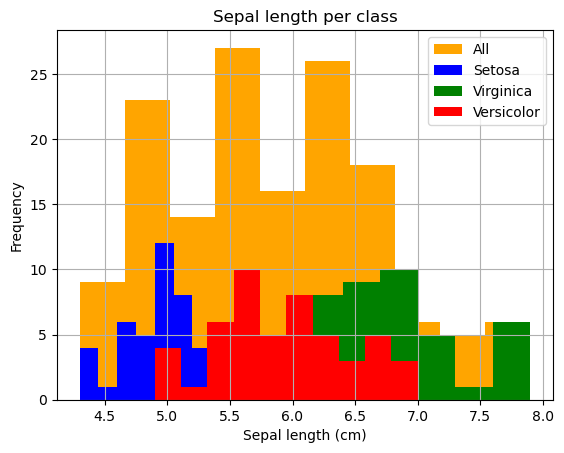

In [8]:
plt.hist(sepal_length, bins=10, color="orange", label="All")
plt.hist(setosa_sepal_length, bins=10, color="blue", label="Setosa")
plt.hist(virginica_sepal_length, bins=10, color="green", label="Virginica")
plt.hist(versicolor_sepal_length, bins=10, color="red", label="Versicolor")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Frequency")
plt.title("Sepal length per class")
plt.legend()
plt.grid(True)
plt.show()

Definimos los bins y discretizamos sepal length:

[ 3  2  2  1  2  3  1  2  1  2  3  2  2  1  4  4  3  3  4  3  3  3  1  3
  2  2  2  3  3  2  2  3  3  4  2  2  4  2  1  3  2  1  1  2  3  2  3  1
  3  2  7  6  7  4  6  4  5  2  6  3  2  5  5  5  4  7  4  4  5  4  5  5
  5  5  6  6  7  7  5  4  4  4  4  5  3  5  7  5  4  4  4  5  4  2  4  4
  4  5  3  4  5  4  7  5  6  9  2  8  7  8  6  6  7  4  4  6  6  9  9  5
  7  4  9  5  7  8  5  5  6  8  8 10  6  5  5  9  5  6  5  7  7  7  4  7
  7  7  5  6  5  5]


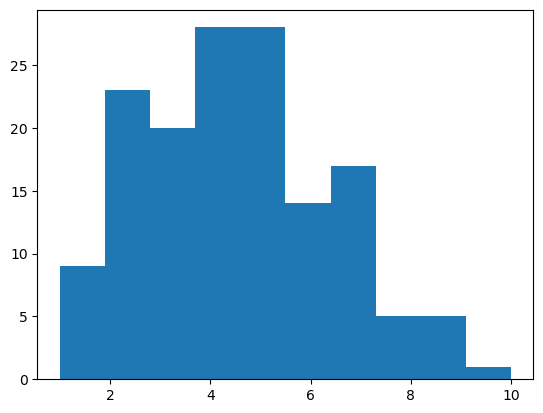

In [9]:
bins = np.linspace(sepal_length.min(), sepal_length.max(), 10)

sepal_length = np.digitize(sepal_length, bins)

print(sepal_length)

plt.hist(sepal_length)
plt.show()

Redefinimos los datos de $X$ divididos por clase con los nuevos datos discretizados, y obtenemos la frecuencia para los bins de cada clase

In [10]:
setosa_sepal_length = sepal_length[y == 0]
versicolor_sepal_length = sepal_length[y == 1]
virginica_sepal_length = sepal_length[y == 2]

In [11]:
setosa_bin_frequencies, _ = np.histogram(setosa_sepal_length, bins=10, range=(1,10))
print("Setosa bins frequencies: ", setosa_bin_frequencies.tolist())

versicolor_bin_frequencies, _ = np.histogram(versicolor_sepal_length, bins=10, range=(1,10))
print("Versicolor bins frequencies: ", versicolor_bin_frequencies.tolist())

virginica_bin_frequencies, _ = np.histogram(virginica_sepal_length, bins=10, range=(1,10))
print("Virginica bins frequencies: ", virginica_bin_frequencies.tolist())

Setosa bins frequencies:  [9, 19, 17, 5, 0, 0, 0, 0, 0, 0]
Versicolor bins frequencies:  [0, 3, 3, 18, 15, 5, 6, 0, 0, 0]
Virginica bins frequencies:  [0, 1, 0, 5, 13, 9, 11, 5, 5, 1]


In [12]:
xvalues = np.unique(sepal_length).tolist()
yvalues = np.unique(y).tolist()

print(xvalues, yvalues)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0, 1, 2]


In [13]:
categories = list(map(lambda x: iris.target_names[x], yvalues))
categories

['setosa', 'versicolor', 'virginica']

Vamos a calcular $p(y|x)$ dividiendo la frecuencia de la clase en un bin entre la frecuencia total de ese bin

In [14]:
bin_frequencies, _ = np.histogram(sepal_length, bins=10, range=(1,10))
bin_frequencies

array([ 9, 23, 20, 28, 28, 14, 17,  5,  5,  1])

In [15]:
p_y_x = pd.DataFrame(0, columns=categories, index=[])
p_y_x["setosa"] = setosa_bin_frequencies / bin_frequencies
p_y_x["versicolor"] = versicolor_bin_frequencies / bin_frequencies
p_y_x["virginica"] = virginica_bin_frequencies / bin_frequencies
p_y_x

,setosa,versicolor,virginica
0,1.000000,0.000000,0.000000
1,0.826087,0.130435,0.043478
2,0.850000,0.150000,0.000000
3,0.178571,0.642857,0.178571
4,0.000000,0.535714,0.464286
5,0.000000,0.357143,0.642857
6,0.000000,0.352941,0.647059
7,0.000000,0.000000,1.000000
8,0.000000,0.000000,1.000000
9,0.000000,0.000000,1.000000


In [16]:
pred_bin = np.digitize(4.75, bins)
pred_bin

2

In [17]:
predictions = np.random.choice(categories, size=10, p=p_y_x.loc[pred_bin - 1]).tolist()
predictions

['setosa',
 'virginica',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'setosa',
 'versicolor',
 'setosa']

## Otra forma utilizando un modelo de tipo mezcla de gaussianas
$p(x) = ∑_y p(y) * N(μ_y,σ_y)$ manteniendo $X =$ sepal length

Obtenemos la media y la desviación estándar del sepal length de cada clase utilizando numpy

In [18]:
setosa_mean = np.mean(setosa_sepal_length)
versicolor_mean = np.mean(versicolor_sepal_length)
virginica_mean = np.mean(virginica_sepal_length)

setosa_std_dev = np.std(setosa_sepal_length)
versicolor_std_dev = np.std(versicolor_sepal_length)
virginica_std_dev = np.std(virginica_sepal_length)

means = np.array([setosa_mean, versicolor_mean, virginica_mean])
stds = np.array([setosa_std_dev, versicolor_std_dev, virginica_std_dev])
p_y = np.ones(3) / 3
classes = np.unique(y)

Sampleo una clase $y$ y, a partir de la media y la desviación estándar, genero una muestra con distribución normal para la $X$ de esa clase 

In [19]:
c = np.random.choice(classes, p=p_y)
c

0

In [20]:
sampled_x = np.random.normal(means[c], stds[c], 100)
sampled_x

array([2.30853636, 0.55110854, 1.93032447, 2.25529138, 0.65730467,
       3.15233652, 1.91569011, 1.75114666, 3.50626918, 2.16317894,
       3.25755197, 1.61905481, 2.00838179, 3.78538077, 2.75683438,
       1.88871466, 2.38752378, 2.40775219, 1.68648966, 3.94293421,
       2.05104314, 1.87142278, 3.81636138, 3.95796118, 1.94068742,
       2.08783834, 2.57026975, 2.88931063, 1.26622536, 3.7173417 ,
       2.91422167, 2.1613533 , 2.63874015, 2.55011072, 1.83850566,
       3.28177891, 2.90979465, 2.74232808, 2.70449372, 1.37302204,
       2.39899973, 1.16669996, 2.90031616, 1.52079546, 3.51078571,
       1.35346551, 2.79717437, 1.71094619, 4.09308857, 4.30405601,
       2.26127072, 2.45059731, 3.00013645, 2.44748287, 1.93671664,
       2.0467603 , 2.56138247, 2.95686955, 2.31877432, 3.24184995,
       2.54759422, 4.0664683 , 1.04486292, 2.64666113, 1.80017002,
       2.23556402, 3.65948652, 2.74812623, 2.22039175, 0.82488773,
       3.79259679, 1.39682553, 1.56835755, 2.21548031, 2.52205

(array([ 4.,  4., 10., 18., 19., 15.,  9.,  9.,  6.,  6.]),
 array([0.55110854, 0.92640328, 1.30169803, 1.67699278, 2.05228752,
        2.42758227, 2.80287702, 3.17817177, 3.55346651, 3.92876126,
        4.30405601]),
 <BarContainer object of 10 artists>)

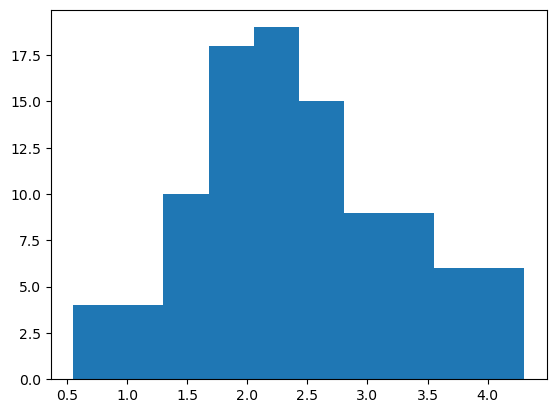

In [21]:
plt.hist(sampled_x)

In [22]:
print("Media de los datos sampleados: ", np.mean(sampled_x))
print("Media original: ", means[c])

print("Desviación estándar de los datos sampleados: ", np.std(sampled_x))
print("Desviación estándar original: ", stds[c])

Media de los datos sampleados:  2.4101309874370234
Media original:  2.36
Desviación estándar de los datos sampleados:  0.8527246394767622
Desviación estándar original:  0.8890444308357147


Se puede observar que los datos sampleados tienen distribución normal y la misma es similar a la original.

## Approximate $p(x|y)$
Take $y$ to be setosa and estimate the probability of sepal length given setosa (or, equivalently, the *likelihood* of setosa given sepal length). Then, generate 10 samples of sepal length and label them appropriately.

### Histogramas
Realizamos histogramas separando por $y$ para observar la distribución de cada clase.

#### Setosa

(array([ 9.,  0.,  0., 19.,  0.,  0., 17.,  0.,  0.,  5.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

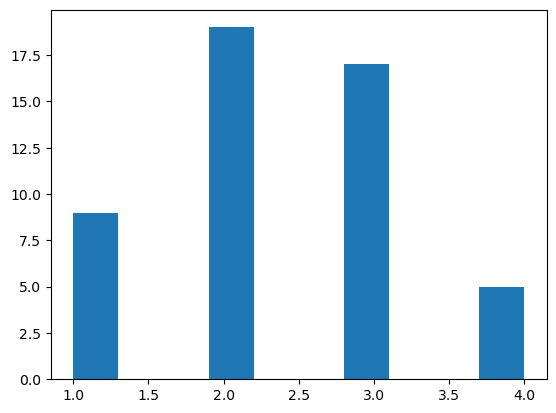

In [23]:
plt.hist(setosa_sepal_length, bins=10)

In [24]:
setosa_sepal_length

array([3, 2, 2, 1, 2, 3, 1, 2, 1, 2, 3, 2, 2, 1, 4, 4, 3, 3, 4, 3, 3, 3,
       1, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 4, 2, 2, 4, 2, 1, 3, 2, 1, 1, 2,
       3, 2, 3, 1, 3, 2])

In [25]:
print("Bins frequencies: ", setosa_bin_frequencies.tolist())

print("Mean: ", setosa_mean)

print("Standard deviation: ", setosa_std_dev)

setosa_sample = np.random.normal(setosa_mean, setosa_std_dev, 1000)

Bins frequencies:  [9, 19, 17, 5, 0, 0, 0, 0, 0, 0]
Mean:  2.36
Standard deviation:  0.8890444308357147


(array([ 1.,  3.,  1.,  0.,  1.,  1.,  5.,  8.,  8.,  9., 12., 16., 19.,
        16., 28., 26., 26., 35., 38., 34., 66., 54., 48., 62., 43., 50.,
        49., 44., 48., 39., 33., 32., 26., 27., 20., 18.,  8., 10., 14.,
         4.,  6.,  3.,  3.,  2.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([-0.45800208, -0.34168761, -0.22537313, -0.10905865,  0.00725583,
         0.1235703 ,  0.23988478,  0.35619926,  0.47251373,  0.58882821,
         0.70514269,  0.82145717,  0.93777164,  1.05408612,  1.1704006 ,
         1.28671508,  1.40302955,  1.51934403,  1.63565851,  1.75197298,
         1.86828746,  1.98460194,  2.10091642,  2.21723089,  2.33354537,
         2.44985985,  2.56617433,  2.6824888 ,  2.79880328,  2.91511776,
         3.03143223,  3.14774671,  3.26406119,  3.38037567,  3.49669014,
         3.61300462,  3.7293191 ,  3.84563357,  3.96194805,  4.07826253,
         4.19457701,  4.31089148,  4.42720596,  4.54352044,  4.65983492,
         4.77614939,  4.89246387,  5.00877835,  5.12509282,

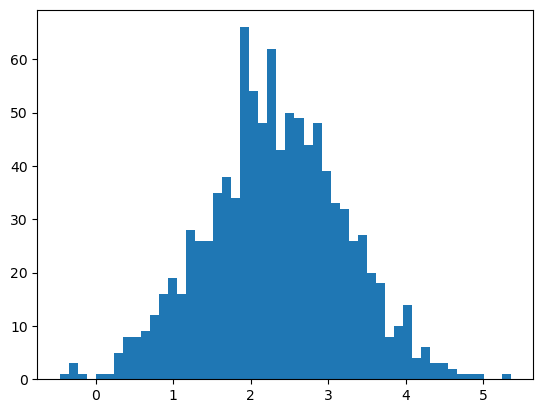

In [26]:
plt.hist(setosa_sample, bins=50)

#### Versicolor

(array([ 3.,  0.,  3.,  0., 18.,  0., 15.,  0.,  5.,  6.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <BarContainer object of 10 artists>)

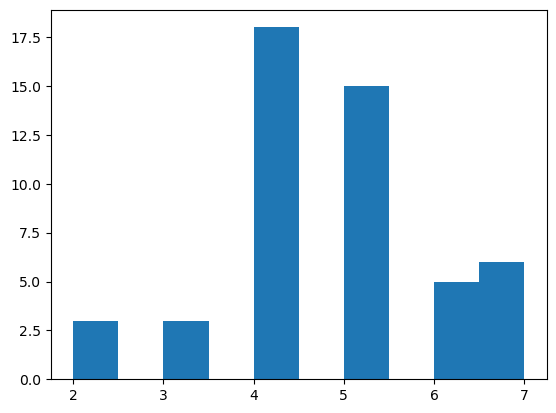

In [27]:
plt.hist(versicolor_sepal_length)

In [28]:
print("Bins frequencies: ", versicolor_bin_frequencies.tolist())

print("Mean: ", versicolor_mean)

print("Standard deviation: ", versicolor_std_dev)

versicolor_sample = np.random.normal(versicolor_mean, versicolor_std_dev, 1000)

Bins frequencies:  [0, 3, 3, 18, 15, 5, 6, 0, 0, 0]
Mean:  4.68
Standard deviation:  1.2718490476467716


(array([ 1.,  1.,  1.,  2.,  0.,  0.,  0.,  2.,  4.,  4.,  5., 12.,  8.,
        12., 11., 24., 22., 21., 31., 38., 30., 45., 45., 43., 39., 45.,
        57., 66., 49., 40., 45., 27., 33., 38., 33., 23., 24., 27., 23.,
        13.,  6., 13.,  6.,  7.,  9.,  9.,  3.,  2.,  0.,  1.]),
 array([0.3830315 , 0.54196832, 0.70090514, 0.85984197, 1.01877879,
        1.17771561, 1.33665243, 1.49558926, 1.65452608, 1.8134629 ,
        1.97239972, 2.13133655, 2.29027337, 2.44921019, 2.60814701,
        2.76708384, 2.92602066, 3.08495748, 3.2438943 , 3.40283113,
        3.56176795, 3.72070477, 3.87964159, 4.03857842, 4.19751524,
        4.35645206, 4.51538888, 4.67432571, 4.83326253, 4.99219935,
        5.15113617, 5.310073  , 5.46900982, 5.62794664, 5.78688346,
        5.94582029, 6.10475711, 6.26369393, 6.42263075, 6.58156758,
        6.7405044 , 6.89944122, 7.05837804, 7.21731487, 7.37625169,
        7.53518851, 7.69412533, 7.85306216, 8.01199898, 8.1709358 ,
        8.32987262]),
 <BarContainer

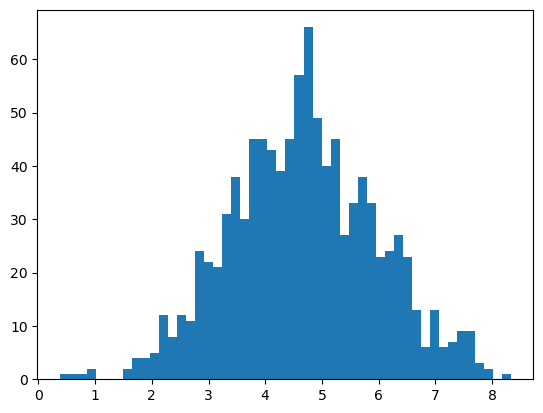

In [29]:
plt.hist(versicolor_sample, bins=50)

#### Virginica

(array([ 1.,  0.,  5., 13.,  0.,  9., 11.,  5.,  5.,  1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

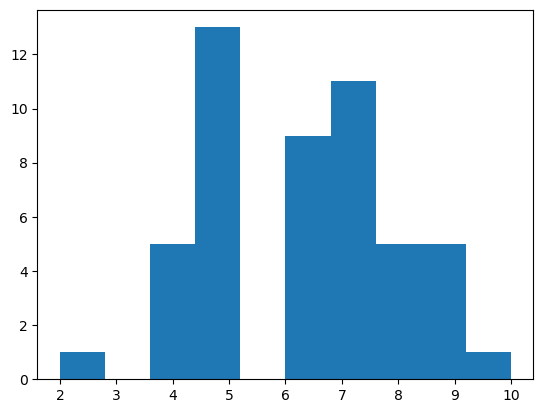

In [30]:
plt.hist(virginica_sepal_length)

In [31]:
print("Bins frequencies: ", virginica_bin_frequencies.tolist())

print("Mean: ", virginica_mean)

print("Standard deviation: ", virginica_std_dev)

virginica_sample = np.random.normal(virginica_mean, virginica_std_dev, 1000)

Bins frequencies:  [0, 1, 0, 5, 13, 9, 11, 5, 5, 1]
Mean:  6.26
Standard deviation:  1.659035864591239


(array([ 1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  3.,  4.,  9.,  6.,  9.,
         5., 16., 18., 25., 32., 29., 30., 37., 34., 39., 46., 51., 55.,
        64., 52., 49., 49., 48., 43., 33., 42., 32., 21., 21., 20., 25.,
        17.,  7.,  4.,  8.,  5.,  5.,  1.,  0.,  0.,  1.,  1.]),
 array([ 0.17054947,  0.39560202,  0.62065456,  0.8457071 ,  1.07075965,
         1.29581219,  1.52086473,  1.74591727,  1.97096982,  2.19602236,
         2.4210749 ,  2.64612745,  2.87117999,  3.09623253,  3.32128507,
         3.54633762,  3.77139016,  3.9964427 ,  4.22149525,  4.44654779,
         4.67160033,  4.89665287,  5.12170542,  5.34675796,  5.5718105 ,
         5.79686305,  6.02191559,  6.24696813,  6.47202067,  6.69707322,
         6.92212576,  7.1471783 ,  7.37223085,  7.59728339,  7.82233593,
         8.04738848,  8.27244102,  8.49749356,  8.7225461 ,  8.94759865,
         9.17265119,  9.39770373,  9.62275628,  9.84780882, 10.07286136,
        10.2979139 , 10.52296645, 10.74801899, 10.97307153,

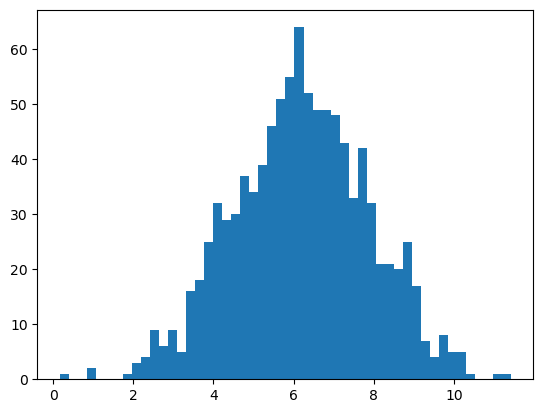

In [32]:
plt.hist(virginica_sample, bins=50)

Comprobamos que en los datos originales hay 3 distribuciones normales pero distintas, ya que cada una tiene una media y desviación estándar distinta: 

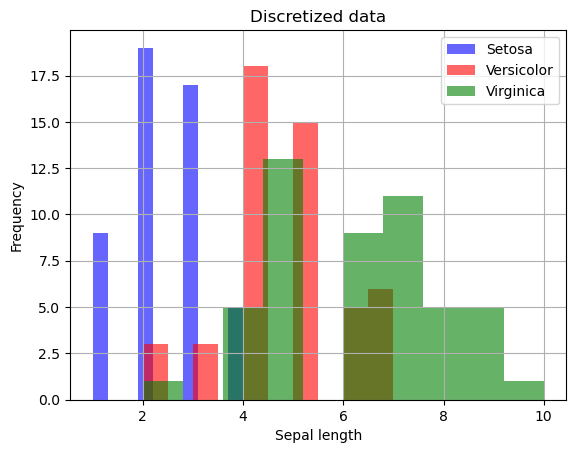

In [38]:
plt.hist(setosa_sepal_length, bins=10, color="blue", alpha=0.6, label="Setosa")
plt.hist(versicolor_sepal_length, bins=10, color="red", alpha=0.6, label="Versicolor")
plt.hist(virginica_sepal_length, bins=10, color="green", alpha=0.6, label="Virginica")
plt.xlabel("Sepal length")
plt.ylabel("Frequency")
plt.title("Discretized data")
plt.legend()
plt.grid(True)
plt.show()

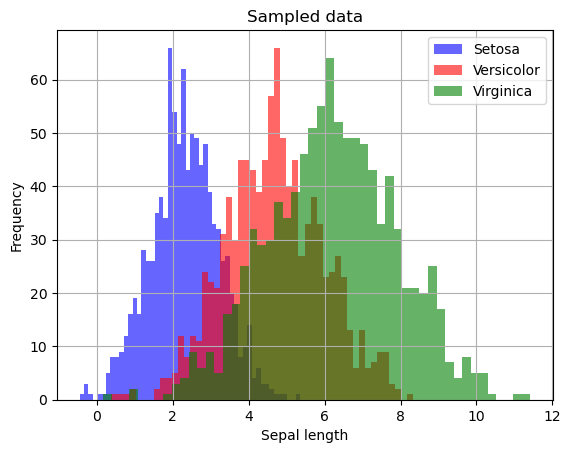

In [37]:
plt.hist(setosa_sample, bins=50, color="blue", alpha=0.6, label="Setosa")
plt.hist(versicolor_sample, bins=50, color="red", alpha=0.6, label="Versicolor")
plt.hist(virginica_sample, bins=50, color="green", alpha=0.6, label="Virginica")
plt.xlabel("Sepal length")
plt.ylabel("Frequency")
plt.title("Sampled data")
plt.legend()
plt.grid(True)
plt.show()

Definimos p(x|y) a partir de los histogramas

In [35]:
p_x_y = pd.DataFrame(0, columns=categories, index=[])
p_x_y["setosa"] = setosa_bin_frequencies / np.sum(setosa_bin_frequencies)
p_x_y["versicolor"] = versicolor_bin_frequencies / np.sum(versicolor_bin_frequencies)
p_x_y["virginica"] = virginica_bin_frequencies / np.sum(virginica_bin_frequencies)
p_x_y

,setosa,versicolor,virginica
0,0.18,0.00,0.00
1,0.38,0.06,0.02
2,0.34,0.06,0.00
3,0.10,0.36,0.10
4,0.00,0.30,0.26
5,0.00,0.10,0.18
6,0.00,0.12,0.22
7,0.00,0.00,0.10
8,0.00,0.00,0.10
9,0.00,0.00,0.02


Se samplea un bin de acuerdo a p(x|y) y dentro del bin obtenido se samplea un x con distribución uniforme

In [36]:
sampled_bins = np.random.choice(xvalues, size=10, p=p_x_y["setosa"])
sampled_values = np.random.uniform(low=np.where(sampled_bins - 2 == -1, bins[0], bins[sampled_bins - 2]), high=np.where(sampled_bins - 2 == -1, bins[1], bins[sampled_bins - 1]))
sampled_values

array([4.52934496, 4.36279352, 5.25085972, 4.87018935, 4.35875775,
       4.87060544, 4.8661165 , 4.35366507, 4.42744661, 4.92807343])